In [527]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

In [528]:
companies = pd.read_csv("companies.csv")

In [529]:
companies.head()

,ticker,company,country,industry
0,1,Prologue,France,Software
1,2,Ekinops SAS,France,Technology Hardware Equipment
2,3,Neuf Cegetel SA,France,Telecommunication
3,4,Societe pour l'Informatique Industrielle,France,Software
4,5,ALTI,France,Software


## Q1: What %age of companies are involved in Life Sciences?

In [530]:
companies.describe()

,ticker
count,500.000000
mean,250.500000
std,144.481833
min,1.000000
25%,125.750000
50%,250.500000
75%,375.250000
max,500.000000


In [531]:
life_sciences_companies = companies[companies['industry'] == 'Life Sciences']
len(life_sciences_companies)

57

In [532]:
len(life_sciences_companies)
print(f"Percentage of companies involved in Life Sciences Industry : {round((len(life_sciences_companies) / len(companies)) * 100, 2)}")

Percentage of companies involved in Life Sciences Industry : 11.4


## Q2: How would you describe the distribution of Market Caps?
## multi choice: leptokurtic/uniform/log normal/positive or negative skew

In [533]:
market_cap = pd.read_csv("cap.csv")

In [534]:
market_cap.head()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,01/01/2020,17694774.82,175643997.6,8605285081,624019175.2,92953488.86,63767251.23,150971605.1,70291060.31,1.046523e+09,...,340726175.8,40662186.23,1.014566e+09,2.559483e+09,3217559633,39924387904,42227951908,3804589802,460705417.1,6057107318
1,02/01/2020,18026818.00,163603084.4,8784351975,636390098.1,88652285.86,62824698.02,151520241.2,69049942.33,1.026802e+09,...,343094821.8,40964764.17,1.015657e+09,2.559116e+09,3172253589,40410444082,42427711748,3799394004,455996284.6,6015714455
2,03/01/2020,18452111.44,164888298.4,8755066604,598463950.3,88820210.97,61495004.89,151705502.9,68006457.58,1.040314e+09,...,341087401.5,40577987.25,1.009019e+09,2.584947e+09,3142614774,39618403691,41474719687,3851075730,444295227.0,5897544498
3,06/01/2020,18326239.56,163589935.1,8378196773,600276888.3,89321676.87,62179458.83,150254563.6,68494842.89,1.026898e+09,...,334637444.8,39904827.95,1.017195e+09,2.543380e+09,3128045821,40480028988,41478266785,3818204438,447783975.2,5999463924
4,07/01/2020,18327454.63,162963638.8,8670112113,590240732.9,89283837.03,63109604.22,149356733.0,68572533.91,1.029184e+09,...,330525953.8,40556943.90,1.000582e+09,2.585363e+09,3150835911,40999140477,42558709221,3466158851,456987713.7,5956736403


In [535]:
market_cap.tail()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
518,27/12/2021,13243526.10,354714406.8,15064197001,782553130.5,104919027.7,52006102.56,189987059.9,39022816.16,633630493.7,...,248812005.1,79589933.53,1.479414e+09,976236170.8,3046660978,26168964389,37535709541,2306087987,244480527.7,10678685043
519,28/12/2021,13349932.35,360721714.9,14972697340,780375713.7,106652963.2,52286652.24,192531521.1,39399203.33,645613067.3,...,239889445.3,79962563.94,1.511557e+09,964049578.2,3029961199,25475642842,36707765779,2299834364,243693035.9,11014514270
520,29/12/2021,13321273.07,361006045.2,15050074698,780360437.7,108183040.6,61411331.20,201890941.6,38845874.38,646387334.3,...,242742273.4,81152620.49,1.511799e+09,966753059.9,3019905731,25568629542,37562179338,2317906364,245434430.7,10914708434
521,30/12/2021,13422938.76,361533986.4,15188096429,783282742.9,107690134.6,61198136.22,199899413.0,38412946.75,657182692.0,...,240517996.7,79002695.20,1.498068e+09,960361375.8,3055377432,25827050921,37273939434,2344136289,245898675.4,10768663036
522,31/12/2021,13145142.23,363013826.7,15232995812,772186861.1,109541116.8,61208487.86,206545462.6,39005960.17,660878310.4,...,241267397.2,79806004.27,1.513537e+09,952420733.2,3015678121,25215936475,37046183049,2378382313,245907864.0,11067420254


In [536]:
market_cap.describe()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
count,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,...,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02
mean,1.330090e+07,2.995783e+08,1.041220e+10,5.932943e+08,1.031812e+08,4.604066e+07,1.638863e+08,5.870017e+07,9.373454e+08,5.313058e+09,...,2.995141e+08,5.252845e+07,1.125503e+09,1.351975e+09,3.438918e+09,2.880097e+10,3.949535e+10,2.986707e+09,3.396936e+08,7.886837e+09
std,2.639117e+06,8.279217e+07,2.163699e+09,1.079775e+08,1.170992e+07,6.089827e+06,2.025638e+07,9.602732e+06,1.767662e+08,6.714708e+08,...,2.893512e+07,1.169471e+07,1.331908e+08,4.388137e+08,3.588209e+08,5.926576e+09,3.065947e+09,5.589997e+08,6.612843e+07,1.531352e+09
min,9.979021e+06,1.608328e+08,6.800356e+09,4.234486e+08,7.878514e+07,3.689526e+07,1.180810e+08,3.841295e+07,5.793679e+08,3.783898e+09,...,2.364505e+08,3.342217e+07,8.876233e+08,9.003392e+08,2.591024e+09,1.929210e+10,3.358255e+10,1.917288e+09,2.094366e+08,5.618860e+09
25%,1.121663e+07,2.049462e+08,8.414572e+09,5.031830e+08,9.486162e+07,4.135678e+07,1.497181e+08,5.130566e+07,8.336920e+08,4.964763e+09,...,2.822608e+08,4.351634e+07,1.029592e+09,1.126620e+09,3.129425e+09,2.474274e+10,3.736990e+10,2.560404e+09,2.929290e+08,6.329649e+09
50%,1.252413e+07,3.375165e+08,1.018678e+10,5.625487e+08,1.008770e+08,4.444586e+07,1.672559e+08,6.087565e+07,9.394465e+08,5.329651e+09,...,3.018242e+08,4.781749e+07,1.099018e+09,1.214474e+09,3.418270e+09,2.643067e+10,3.889865e+10,3.149599e+09,3.444996e+08,7.982418e+09
75%,1.402665e+07,3.667588e+08,1.239591e+10,7.066303e+08,1.076922e+08,4.944091e+07,1.784934e+08,6.639765e+07,1.077415e+09,5.831197e+09,...,3.194787e+08,5.980223e+07,1.192290e+09,1.325366e+09,3.754274e+09,3.263689e+10,4.131109e+10,3.380681e+09,3.744260e+08,9.293901e+09
max,2.000803e+07,4.258949e+08,1.523300e+10,8.167460e+08,1.357709e+08,6.670460e+07,2.083169e+08,7.715440e+07,1.315477e+09,6.725999e+09,...,3.732590e+08,8.115262e+07,1.513537e+09,2.585363e+09,4.294326e+09,4.369416e+10,4.795143e+10,4.168056e+09,4.991077e+08,1.106742e+10


In [538]:
from scipy.stats import skew, kurtosis, shapiro

In [539]:
tot_skew = 0
for num in range(1, 501):
    col = str(num)
    sample_mcap = market_cap[col]
    sample_skew = skew(sample_mcap)
    tot_skew += sample_skew
avg_skew = tot_skew / 500
avg_skew

0.3430470178396132

In [541]:
tot_kurt = 0
for num in range(1, 501):
    col = str(num)
    sample_mcap = market_cap[col]
    sample_kurt = kurtosis(sample_mcap, fisher=True)
    tot_kurt += sample_kurt
avg_kurt = tot_kurt / 501
avg_kurt

-0.41092835752587215

In [542]:
# From Excel:
# Average Skewness: 0.342587948 -> Positive Skew
# Average Kurtosis: -0.404153302 -> Less than 0 means Platykurtic / More than 0 means Leptokurtic
# Since Market Caps are positive, generally these distributions are LogNormally distributed
# LogNormal distributions are also generally positively skewed and leptokurtic

## Q3:  On which one of these days was there the highest standard deviation: 2020-03-23, 2020-03-30, 2020-11-18, 2020-11-25, 2021-01-04

In [543]:
returns = pd.read_csv("ret.csv")

In [544]:
returns.head()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,2020-01-01,-0.010555,-0.018010,0.009118,-0.031509,0.015557,0.003820,0.042103,-0.010133,0.009885,...,-0.006961,0.013277,0.052542,0.038717,-0.010416,0.011411,0.024825,-0.003267,-0.004797,-0.017877
1,2020-01-02,0.018765,-0.068553,0.020809,0.019825,-0.046273,-0.014781,0.003634,-0.017657,-0.018844,...,0.006952,0.007441,0.001075,-0.000144,-0.014081,0.012174,0.004731,-0.001366,-0.010222,-0.006834
2,2020-01-03,0.023592,0.007856,-0.003334,-0.059596,0.001894,-0.021165,0.001223,-0.015112,0.013159,...,-0.005851,-0.009442,-0.006535,0.010094,-0.009343,-0.019600,-0.022462,0.013603,-0.025660,-0.019644
3,2020-01-06,-0.006822,-0.007874,-0.043046,0.003029,0.005646,0.011130,-0.009564,0.007181,-0.012896,...,-0.018910,-0.016589,0.008103,-0.016080,-0.004636,0.021748,0.000086,-0.008536,0.007852,0.017282
4,2020-01-07,0.000066,-0.003828,0.034842,-0.016719,-0.000424,0.014959,-0.005975,0.001134,0.002226,...,-0.012286,0.016342,-0.016332,0.016506,0.007286,0.012824,0.026048,-0.092202,0.020554,-0.007122


In [545]:
rolling_std_ret = pd.DataFrame(data=returns)
rolling_std_ret.columns = rolling_std_ret.columns.str.replace(' ', '')
rolling_std_ret.columns

Index(['Dates', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499', '500'],
      dtype='object', length=501)

In [546]:
for tic in range(1, 501):
    col = str(tic) + ' std'
    rolling_std_ret[col] = rolling_std_ret[str(tic)].std()
rolling_std_ret.tail()

/var/folders/z8/18vf272n36z6tx1xm5tv3qvw0000gn/T/ipykernel_69539/493421258.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rolling_std_ret[col] = rolling_std_ret[str(tic)].std()
/var/folders/z8/18vf272n36z6tx1xm5tv3qvw0000gn/T/ipykernel_69539/493421258.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rolling_std_ret[col] = rolling_std_ret[str(tic)].std()
/var/folders/z8/18vf272n36z6tx1xm5tv3qvw0000gn/T/ipykernel_69539/493421258.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

,Dates,1,2,3,4,5,6,7,8,9,...,491 std,492 std,493 std,494 std,495 std,496 std,497 std,498 std,499 std,500 std
518,2021-12-27,0.003109,-0.011529,0.010036,-0.028102,0.010155,-0.007225,-0.010816,-0.037116,0.019227,...,0.020742,0.02224,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872
519,2021-12-28,0.008035,0.016936,-0.006074,-0.002782,0.016526,0.005395,0.013393,0.009645,0.018911,...,0.020742,0.02224,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872
520,2021-12-29,-0.002147,0.000788,0.005168,-0.000020,0.014346,0.174513,0.048612,-0.014044,0.001199,...,0.020742,0.02224,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872
521,2021-12-30,0.007632,0.001462,0.009171,0.003745,-0.004556,-0.003472,-0.009864,-0.011145,0.016701,...,0.020742,0.02224,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872
522,2021-12-31,-0.020696,0.004093,0.002956,-0.014166,0.017188,0.000169,0.033247,0.015438,0.005623,...,0.020742,0.02224,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872


In [364]:
dates = ['2020-03-23', '2020-03-30', '2020-11-18', '2020-11-25', '2021-01-04']

In [552]:
returns.columns = returns.columns.str.replace(' ', '')
ret_cols = returns.columns[1:]
ret_cols

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499', '500'],
      dtype='object', length=500)

## Q4. Find the ticker of the french company with the lowest standard deviation of returns.

In [553]:
french_firms = companies[companies['country'] == 'France']

In [554]:
returns.columns = returns.columns.str.replace(' ', '')
returns.columns

Index(['Dates', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499', '500'],
      dtype='object', length=501)

In [555]:
french_firms.head()

,ticker,company,country,industry
0,1,Prologue,France,Software
1,2,Ekinops SAS,France,Technology Hardware Equipment
2,3,Neuf Cegetel SA,France,Telecommunication
3,4,Societe pour l'Informatique Industrielle,France,Software
4,5,ALTI,France,Software


In [556]:
ret_desc

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,-0.000364,0.001560,0.001306,0.000607,0.000631,0.000190,0.000869,-0.000938,-0.000653,0.000311,...,-0.000457,0.001564,0.001047,-0.001577,0.000073,-0.000648,-0.000030,-0.000664,-0.001012,0.001337
std,0.021038,0.020396,0.019926,0.022922,0.024053,0.022834,0.019484,0.020399,0.020359,0.020097,...,0.020742,0.022240,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872
min,-0.164478,-0.068553,-0.067160,-0.180142,-0.183143,-0.167871,-0.124366,-0.109512,-0.086783,-0.143181,...,-0.132112,-0.115655,-0.075925,-0.163037,-0.149620,-0.094602,-0.113283,-0.099188,-0.107835,-0.098935
25%,-0.009625,-0.009278,-0.009841,-0.009748,-0.010842,-0.010005,-0.009499,-0.011403,-0.011624,-0.011158,...,-0.010948,-0.009038,-0.009042,-0.011969,-0.010345,-0.011462,-0.010716,-0.010377,-0.010601,-0.008892
50%,-0.000082,0.001462,0.000830,0.000421,0.000986,-0.000223,0.000840,-0.000713,-0.000969,0.001819,...,-0.000366,0.002503,-0.001250,-0.001259,0.000299,0.001012,-0.000129,0.000517,-0.000327,0.001989
75%,0.009002,0.011736,0.011193,0.011034,0.011132,0.009894,0.011480,0.009885,0.009516,0.011100,...,0.008125,0.012490,0.010282,0.010013,0.010720,0.010077,0.010235,0.010457,0.009857,0.012988
max,0.106867,0.128787,0.136027,0.208867,0.216330,0.174513,0.082216,0.137481,0.093766,0.093086,...,0.119125,0.120581,0.119215,0.163216,0.086538,0.080023,0.091295,0.119889,0.103835,0.094517


In [557]:
ret_desc.columns = ret_desc.columns.str.replace(' ', '')
ret_desc

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,-0.000364,0.001560,0.001306,0.000607,0.000631,0.000190,0.000869,-0.000938,-0.000653,0.000311,...,-0.000457,0.001564,0.001047,-0.001577,0.000073,-0.000648,-0.000030,-0.000664,-0.001012,0.001337
std,0.021038,0.020396,0.019926,0.022922,0.024053,0.022834,0.019484,0.020399,0.020359,0.020097,...,0.020742,0.022240,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872
min,-0.164478,-0.068553,-0.067160,-0.180142,-0.183143,-0.167871,-0.124366,-0.109512,-0.086783,-0.143181,...,-0.132112,-0.115655,-0.075925,-0.163037,-0.149620,-0.094602,-0.113283,-0.099188,-0.107835,-0.098935
25%,-0.009625,-0.009278,-0.009841,-0.009748,-0.010842,-0.010005,-0.009499,-0.011403,-0.011624,-0.011158,...,-0.010948,-0.009038,-0.009042,-0.011969,-0.010345,-0.011462,-0.010716,-0.010377,-0.010601,-0.008892
50%,-0.000082,0.001462,0.000830,0.000421,0.000986,-0.000223,0.000840,-0.000713,-0.000969,0.001819,...,-0.000366,0.002503,-0.001250,-0.001259,0.000299,0.001012,-0.000129,0.000517,-0.000327,0.001989
75%,0.009002,0.011736,0.011193,0.011034,0.011132,0.009894,0.011480,0.009885,0.009516,0.011100,...,0.008125,0.012490,0.010282,0.010013,0.010720,0.010077,0.010235,0.010457,0.009857,0.012988
max,0.106867,0.128787,0.136027,0.208867,0.216330,0.174513,0.082216,0.137481,0.093766,0.093086,...,0.119125,0.120581,0.119215,0.163216,0.086538,0.080023,0.091295,0.119889,0.103835,0.094517


In [558]:
min_std = float('infinity')
for tic in french_companies['ticker']:
    curr_std_dev = ret_desc.loc['std',str(tic)]
    if curr_std_dev <= min_std:
        min_std = curr_std_dev
        min_ticker = tic
min_ticker   

15

In [559]:
minimum_std = float('infinity')
for tic in french_companies['ticker']:
    std_dev = returns[str(tic)].std()
    if std_dev <= minimum_std:
        minimum_std = std_dev
        min_tic = tic

min_tic

15

## Q5: Which company has a data quality issue? Find it, and remove it from the dataset. (I had one with a constant return, ticker = '201', look through these using standard deviations)

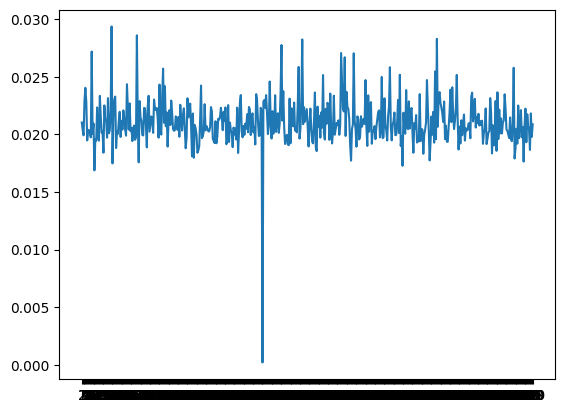

In [560]:
ret_desc = returns.describe()
std_ret = ret_desc.loc['std']
plt.plot(std_ret)

In [561]:
std_ret.idxmin()

'201'

In [562]:
min(std_ret)

0.00019433089655262854

In [563]:
returns = returns.drop('201', axis = 1)

In [564]:
try:
    returns['201']
except:
    print("Column not present")

Column not present


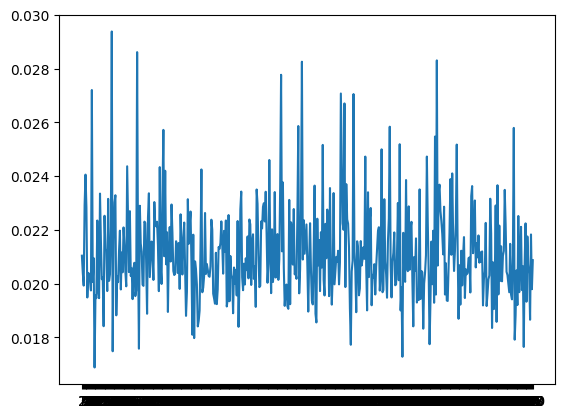

In [565]:
ret_desc = returns.describe()
std_ret = ret_desc.loc['std']
plt.plot(std_ret)

## Q6. How many companies had a positive return after the first vaccine was announced?

In [566]:
vaccines = pd.read_csv('vaccines.csv')
vaccines.head()

,name,sponsor,study,resultsDate
0,Oxford-AstraZeneca COVID-19 vaccine (Vaxzevria...,"University of Oxford, AstraZeneca, CEPI","Phase III (30,000) Interventional; randomized,...",2020-12-08
1,Pfizer-BioNTech COVID-19 vaccine (Comirnaty),"BioNTech, Pfizer","Phase III (43,998) Randomized, placebo-control...",2020-11-18
2,Janssen COVID-19 vaccine,"Janssen Vaccines (Johnson & Johnson), BIDMC","Phase III (40,000) Randomized, double-blinded,...",2021-01-29
3,Moderna COVID-19 vaccine (Spikevax),"Moderna, NIAID, BARDA, CEPI","Phase III (30,000) Interventional; randomized,...",2020-11-16


In [567]:
vaccines.describe()

,name,sponsor,study,resultsDate
count,4,4,4,4
unique,4,4,4,4
top,Oxford-AstraZeneca COVID-19 vaccine (Vaxzevria...,"University of Oxford, AstraZeneca, CEPI","Phase III (30,000) Interventional; randomized,...",2020-12-08
freq,1,1,1,1


In [568]:
first_vaccine_date = min(vaccines['resultsDate'])
first_vaccine_date

'2020-11-16'

In [569]:
returns.set_index('Dates',inplace=True)
returns.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,-0.010555,-0.018010,0.009118,-0.031509,0.015557,0.003820,0.042103,-0.010133,0.009885,-0.016683,...,-0.006961,0.013277,0.052542,0.038717,-0.010416,0.011411,0.024825,-0.003267,-0.004797,-0.017877
2020-01-02,0.018765,-0.068553,0.020809,0.019825,-0.046273,-0.014781,0.003634,-0.017657,-0.018844,0.028491,...,0.006952,0.007441,0.001075,-0.000144,-0.014081,0.012174,0.004731,-0.001366,-0.010222,-0.006834
2020-01-03,0.023592,0.007856,-0.003334,-0.059596,0.001894,-0.021165,0.001223,-0.015112,0.013159,0.025626,...,-0.005851,-0.009442,-0.006535,0.010094,-0.009343,-0.019600,-0.022462,0.013603,-0.025660,-0.019644
2020-01-06,-0.006822,-0.007874,-0.043046,0.003029,0.005646,0.011130,-0.009564,0.007181,-0.012896,-0.008368,...,-0.018910,-0.016589,0.008103,-0.016080,-0.004636,0.021748,0.000086,-0.008536,0.007852,0.017282
2020-01-07,0.000066,-0.003828,0.034842,-0.016719,-0.000424,0.014959,-0.005975,0.001134,0.002226,-0.009807,...,-0.012286,0.016342,-0.016332,0.016506,0.007286,0.012824,0.026048,-0.092202,0.020554,-0.007122


In [570]:
next_day_ret = returns.loc['2020-11-17']
next_day_ret

1      0.017965
2      0.058150
3      0.010575
4     -0.016040
5      0.021275
         ...   
496    0.061347
497   -0.029911
498    0.004149
499    0.028918
500    0.041181
Name: 2020-11-17, Length: 499, dtype: float64

In [572]:
pos_count = (next_day_ret > 0).sum()
pos_count

393

## Q7. What was the average cumulative return for each company for the first 3 days after the first vaccine was announced

In [573]:
first_vaccine_date_object = datetime.strptime(first_vaccine_date, "%Y-%m-%d")
first_date = (first_vaccine_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
last_date = (first_vaccine_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(first_date, last_date)

2020-11-17 2020-11-19


In [574]:
sliced_returns = returns.loc[first_date:last_date]
sliced_returns

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-11-17,0.017965,0.058150,0.010575,-0.016040,0.021275,0.035132,0.014430,0.005167,0.026395,0.002646,...,-0.011707,-0.001111,0.019844,-0.029230,0.010392,0.061347,-0.029911,0.004149,0.028918,0.041181
2020-11-18,0.021494,-0.046688,0.011320,0.072605,-0.012109,-0.014833,-0.008484,0.056846,0.016709,0.014172,...,0.027723,0.017564,0.003760,0.042098,0.028305,-0.062045,0.050833,0.026220,0.001756,-0.016230
2020-11-19,-0.006583,-0.047972,-0.049491,0.034978,0.004906,-0.007578,0.016496,-0.023641,-0.001253,-0.038899,...,0.026008,0.000037,-0.014449,0.003299,0.025043,0.007040,0.004041,0.005047,0.000383,0.037476


In [575]:
cum_ret_post_vaccine = ((1 + sliced_returns).cumprod() - 1)
cum_ret_post_vaccine

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-11-17,0.017965,0.058150,0.010575,-0.016040,0.021275,0.035132,0.014430,0.005167,0.026395,0.002646,...,-0.011707,-0.001111,0.019844,-0.029230,0.010392,0.061347,-0.029911,0.004149,0.028918,0.041181
2020-11-18,0.039845,0.008747,0.022015,0.055401,0.008909,0.019778,0.005823,0.062307,0.043545,0.016855,...,0.015691,0.016434,0.023679,0.011637,0.038991,-0.004504,0.019402,0.030478,0.030724,0.024282
2020-11-19,0.033000,-0.039644,-0.028566,0.092317,0.013859,0.012050,0.022415,0.037193,0.042237,-0.022699,...,0.042107,0.016471,0.008888,0.014975,0.065011,0.002504,0.023521,0.035679,0.031119,0.062668


In [576]:
cum_ret_post_vaccine.loc['2020-11-19'].mean()

0.025153445023670572

In [578]:
avg_cum_ret_post_vaccine = cum_ret_post_vaccine.loc['2020-11-19'].mean()
round(avg_cum_ret_post_vaccine, 2)

0.03

## Q8. Find the average cumulative return of the stocks for each country for the first 3 days after the first stay at home order was announced

In [579]:
restrictions = pd.read_csv("restrictions.csv")
restrictions.head()

,country,measure,definition,date_start,date_end
0,France,MasksMandatoryAllSpaces,Mask mandate in all spaces,2020-10-28,2021-06-16
1,France,PlaceOfWorship,Places or worship closed (full or partial),2020-10-28,2021-06-30
2,France,QuarantineForArrivals,Quarantine for int. travellers (full or partial),2021-06-09,NaT
3,France,StayAtHome,Stay at home order (binding or non-binding),2020-03-17,2020-05-11
4,France,StayAtHome,Stay at home order (binding or non-binding),2020-10-28,2020-12-14


In [580]:
countries = restrictions['country'].unique().tolist()
countries

['France', 'Germany', 'Italy', 'Switzerland', 'United Kingdom']

In [581]:
country_first_restriction = {}
for country in countries:
    _data = restrictions[restrictions['country'] == str(country)]
    _stay_at_home_date = _data[(_data['country'] == str(country)) & 
                               (_data['measure'] == 'StayAtHome')]['date_start'].values[0]
    country_first_restriction[str(country)] = _stay_at_home_date
country_first_restriction

{'France': '2020-03-17',
 'Germany': '2020-03-17',
 'Italy': '2020-10-26',
 'Switzerland': '2020-12-22',
 'United Kingdom': '2020-03-16'}

In [582]:
uk_companies = companies[companies['country'] == 'UK']
french_companies = companies[companies['country'] == 'France']
german_companies = companies[companies['country'] == 'Germany']
italian_companies = companies[companies['country'] == 'Italy']
swiss_companies = companies[companies['country'] == 'Switzerland']

In [583]:
french_ticker = french_companies['ticker'].tolist()
french_first_tic, french_last_tic = french_ticker[0], french_ticker[-1]
print(french_first_tic, french_last_tic)

1 100


In [584]:
french_ret = returns.loc[:, str(french_first_tic):str(french_last_tic)]
french_ret.head(3)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,-0.010555,-0.018010,0.009118,-0.031509,0.015557,0.003820,0.042103,-0.010133,0.009885,-0.016683,...,0.011355,0.025099,0.029932,0.009478,0.044999,-0.002238,-0.025447,0.027163,-0.009815,0.002266
2020-01-02,0.018765,-0.068553,0.020809,0.019825,-0.046273,-0.014781,0.003634,-0.017657,-0.018844,0.028491,...,0.056167,0.015877,-0.058863,-0.041604,-0.006136,-0.014550,0.016007,0.016602,0.011773,-0.014130
2020-01-03,0.023592,0.007856,-0.003334,-0.059596,0.001894,-0.021165,0.001223,-0.015112,0.013159,0.025626,...,-0.003845,-0.000653,0.011758,0.014686,-0.004757,-0.010519,0.008737,0.001884,0.032864,-0.006630


In [585]:
french_first_date_object = datetime.strptime(country_first_restriction['France'], "%Y-%m-%d")
french_first_date_str = (french_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
french_last_date_str = (french_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(french_first_date_str, french_last_date_str)

2020-03-18 2020-03-20


In [586]:
french_ret_post_measure = french_ret.loc[french_first_date_str:french_last_date_str]
french_ret_post_measure

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-18,-0.004912,-0.049122,-0.043502,0.009716,-0.001960,0.015876,-0.038304,-0.040031,-0.013907,-0.037328,...,-0.022310,-0.013845,-0.015142,0.001109,-0.047512,-0.062014,-0.013879,-0.015434,-0.064041,-0.045655
2020-03-19,-0.000852,0.002272,0.016165,-0.012567,0.012381,0.045657,0.059677,-0.058993,-0.052369,0.023005,...,-0.029180,-0.054966,-0.041774,-0.041134,0.059955,0.055141,-0.009011,-0.152686,0.005512,0.009115
2020-03-20,0.022308,-0.016359,-0.004154,0.021928,0.001158,0.047373,-0.012230,-0.004768,0.007588,-0.009665,...,-0.013222,-0.033997,-0.037916,0.030038,-0.049605,0.036082,0.021496,-0.047033,-0.011010,-0.063068


In [587]:
french_cum_ret_post_measure = ((1 + french_ret_post_measure).cumprod() - 1)
french_cum_ret_post_measure

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-18,-0.004912,-0.049122,-0.043502,0.009716,-0.001960,0.015876,-0.038304,-0.040031,-0.013907,-0.037328,...,-0.022310,-0.013845,-0.015142,0.001109,-0.047512,-0.062014,-0.013879,-0.015434,-0.064041,-0.045655
2020-03-19,-0.005760,-0.046961,-0.028040,-0.002973,0.010397,0.062259,0.019088,-0.096662,-0.065547,-0.015182,...,-0.050839,-0.068050,-0.056283,-0.040071,0.009595,-0.010293,-0.022765,-0.165763,-0.058882,-0.036956
2020-03-20,0.016419,-0.062552,-0.032078,0.018890,0.011567,0.112581,0.006624,-0.100969,-0.058457,-0.024701,...,-0.063389,-0.099733,-0.092065,-0.011237,-0.040486,0.025418,-0.001758,-0.205000,-0.069244,-0.097693


In [588]:
french_avg_cum_ret_post_measure = french_cum_ret_post_measure.loc[french_last_date_str].mean()
round(french_avg_cum_ret_post_measure * 100, 2)

-5.07

In [589]:
german_ticker = german_companies['ticker'].tolist()
german_first_tic, german_last_tic = german_ticker[0], german_ticker[-1]
print(german_first_tic, german_last_tic)

101 200


In [590]:
german_ret = returns.loc[:, str(german_first_tic):str(german_last_tic)]
german_ret.head(3)

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.017965,-0.007469,0.000953,-0.019903,-0.000048,0.002195,0.029007,0.085219,0.000872,-0.018782,...,0.016403,-0.000432,-0.001990,0.011263,-0.001735,0.000626,-0.014064,0.036543,-0.010242,-0.033464
2020-01-02,0.022493,-0.002697,-0.001433,-0.012418,0.009599,-0.019762,0.015491,0.004654,0.005720,0.005541,...,-0.012260,-0.001310,0.005069,0.001472,0.004491,0.003282,-0.018364,0.005217,0.009136,0.026553
2020-01-03,0.003186,0.008534,-0.000992,-0.018899,-0.030966,-0.016684,0.005108,-0.005633,0.014978,0.013017,...,-0.009136,0.013913,0.039505,-0.016280,0.013043,0.018932,-0.012062,-0.005507,0.000471,0.008701


In [591]:
german_first_date_object = datetime.strptime(country_first_restriction['Germany'], "%Y-%m-%d")
german_first_date_str = (german_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
german_last_date_str = (german_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(german_first_date_str, german_last_date_str)

2020-03-18 2020-03-20


In [592]:
german_ret_post_measure = german_ret.loc[german_first_date_str:german_last_date_str]
german_ret_post_measure

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-18,-0.097547,-0.046764,0.066667,0.006233,-0.044440,-0.034385,0.009367,-0.036287,-0.082997,-0.008745,...,-0.045886,-0.072096,-0.027708,-0.064689,-0.055262,0.056212,0.032290,0.000176,-0.027268,0.080427
2020-03-19,0.083857,-0.024906,-0.092873,-0.051010,-0.009690,0.015085,-0.057806,-0.036700,0.006574,-0.038932,...,0.023954,-0.002620,-0.009101,0.173061,0.066514,-0.124744,-0.084036,-0.056034,0.029840,-0.080733
2020-03-20,0.005159,-0.040829,-0.005842,0.078602,0.060738,0.024916,0.034283,-0.039556,-0.008272,-0.034251,...,-0.020653,-0.041093,-0.054086,0.021343,-0.036844,-0.074891,-0.022814,0.001565,-0.004895,-0.003260


In [593]:
german_cum_ret_post_measure = ((1 + german_ret_post_measure).cumprod() - 1)
german_cum_ret_post_measure

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-18,-0.097547,-0.046764,0.066667,0.006233,-0.044440,-0.034385,0.009367,-0.036287,-0.082997,-0.008745,...,-0.045886,-0.072096,-0.027708,-0.064689,-0.055262,0.056212,0.032290,0.000176,-0.027268,0.080427
2020-03-19,-0.021870,-0.070506,-0.032397,-0.045095,-0.053699,-0.019819,-0.048981,-0.071656,-0.076969,-0.047336,...,-0.023031,-0.074527,-0.036557,0.097177,0.007576,-0.075544,-0.054459,-0.055868,0.001758,-0.006800
2020-03-20,-0.016824,-0.108456,-0.038050,0.029963,0.003777,0.004604,-0.016377,-0.108377,-0.084604,-0.079966,...,-0.043209,-0.112558,-0.088666,0.120595,-0.029547,-0.144778,-0.076031,-0.054390,-0.003146,-0.010038


In [594]:
german_avg_cum_ret_post_measure = german_cum_ret_post_measure.loc[german_last_date_str].mean()
round(german_avg_cum_ret_post_measure * 100, 2)

-4.89

In [595]:
italy_ticker = italian_companies['ticker'].tolist()
italy_first_tic, italy_last_tic = italy_ticker[0], italy_ticker[-1]
print(italy_first_tic, italy_last_tic)

201 300


In [596]:
italy_ret = returns.loc[:, str(italy_first_tic+ 1):str(italy_last_tic)]
italy_ret.head(3)

,202,203,204,205,206,207,208,209,210,211,...,291,292,293,294,295,296,297,298,299,300
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.010112,0.009109,0.012801,0.002150,0.016817,-0.004957,-0.000739,-0.002733,-0.010644,0.029006,...,0.022175,0.044601,0.008777,0.001323,0.014030,0.015628,-0.025817,0.002940,0.003119,0.002196
2020-01-02,-0.020629,0.011538,-0.004732,-0.014590,0.004176,-0.034375,0.006895,0.006247,0.010360,-0.007339,...,-0.014450,-0.012076,-0.028989,-0.018030,-0.004554,-0.006119,0.004866,0.015772,0.012614,0.022059
2020-01-03,-0.015327,-0.015856,-0.017026,-0.000448,-0.010362,-0.002652,0.017406,0.009172,-0.008967,-0.003730,...,0.000134,0.004624,0.011413,-0.008494,-0.005234,-0.001913,-0.008131,0.004112,0.005487,0.013951


In [597]:
italy_first_date_object = datetime.strptime(country_first_restriction['Italy'], "%Y-%m-%d")
italy_first_date_str = (italy_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
italy_last_date_str = (italy_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(italy_first_date_str, italy_last_date_str)

2020-10-27 2020-10-29


In [598]:
italy_ret_post_measure = italy_ret.loc[italy_first_date_str:italy_last_date_str]
italy_ret_post_measure

,202,203,204,205,206,207,208,209,210,211,...,291,292,293,294,295,296,297,298,299,300
Dates,,,,,,,,,,,,,,,,,,,,,
2020-10-27,0.009090,0.009843,-0.012471,-0.008175,-0.094688,0.003746,0.025284,0.009906,-0.015642,0.003085,...,-0.018972,0.009254,-0.018235,0.019858,0.033663,-0.009182,0.006651,0.007116,0.013812,-0.006575
2020-10-28,0.021530,0.003888,0.000441,-0.021809,0.010760,0.012112,-0.005126,-0.008289,-0.030002,-0.006067,...,-0.018242,-0.011592,0.004879,0.000857,0.005863,0.010008,0.000084,-0.013798,0.016554,0.007075
2020-10-29,0.002341,0.002689,-0.021370,0.006007,0.000273,0.017841,-0.058295,0.011999,-0.028384,0.036289,...,0.010271,-0.001824,-0.014315,0.003021,-0.010692,0.002472,-0.010320,-0.008300,0.035757,0.005730


In [599]:
italy_cum_ret_post_measure = ((1 + italy_ret_post_measure).cumprod() - 1)
italy_cum_ret_post_measure

,202,203,204,205,206,207,208,209,210,211,...,291,292,293,294,295,296,297,298,299,300
Dates,,,,,,,,,,,,,,,,,,,,,
2020-10-27,0.009090,0.009843,-0.012471,-0.008175,-0.094688,0.003746,0.025284,0.009906,-0.015642,0.003085,...,-0.018972,0.009254,-0.018235,0.019858,0.033663,-0.009182,0.006651,0.007116,0.013812,-0.006575
2020-10-28,0.030816,0.013770,-0.012035,-0.029806,-0.084946,0.015903,0.020028,0.001535,-0.045174,-0.003001,...,-0.036868,-0.002445,-0.013445,0.020732,0.039724,0.000734,0.006735,-0.006780,0.030594,0.000453
2020-10-29,0.033230,0.016496,-0.033148,-0.023978,-0.084696,0.034028,-0.039434,0.013553,-0.072276,0.033179,...,-0.026976,-0.004264,-0.027567,0.023816,0.028607,0.003208,-0.003654,-0.015024,0.067445,0.006186


In [600]:
italy_avg_cum_ret_post_measure = italy_cum_ret_post_measure.loc[italy_last_date_str].mean()
round(italy_avg_cum_ret_post_measure * 100, 2)

0.37

In [601]:
switzerland_ticker = swiss_companies['ticker'].tolist()
switzerland_first_tic, switzerland_last_tic = switzerland_ticker[0], switzerland_ticker[-1]
print(switzerland_first_tic, switzerland_last_tic)

301 400


In [602]:
switzerland_ret = returns.loc[:, str(switzerland_first_tic):str(switzerland_last_tic)]
switzerland_ret.head(3)

,301,302,303,304,305,306,307,308,309,310,...,391,392,393,394,395,396,397,398,399,400
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.016341,-0.007869,0.012512,-0.025329,0.013410,-0.016847,0.002640,0.005043,0.000306,0.048631,...,0.019563,-0.017633,0.012200,-0.004235,0.018381,-0.000369,0.020443,-0.002746,0.007014,0.000697
2020-01-02,0.017560,-0.026555,-0.004623,0.010613,0.061741,0.027897,-0.017466,0.020595,-0.002111,-0.000176,...,-0.001690,0.013026,0.009323,-0.006817,-0.002087,-0.003247,-0.003458,0.002700,-0.002881,0.002778
2020-01-03,-0.000305,0.012524,-0.013166,-0.007789,-0.002930,0.007569,-0.020101,-0.004308,-0.025117,-0.004798,...,0.014884,-0.021454,0.004245,-0.062506,0.004559,-0.020720,-0.011929,-0.001139,0.005312,-0.006404


In [603]:
switzerland_first_date_object = datetime.strptime(country_first_restriction['Switzerland'], "%Y-%m-%d")
switzerland_first_date_str = (switzerland_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
switzerland_last_date_str = (switzerland_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(switzerland_first_date_str, switzerland_last_date_str)

2020-12-23 2020-12-25


In [604]:
switzerland_ret_post_measure = switzerland_ret.loc[switzerland_first_date_str:switzerland_last_date_str]
switzerland_ret_post_measure

,301,302,303,304,305,306,307,308,309,310,...,391,392,393,394,395,396,397,398,399,400
Dates,,,,,,,,,,,,,,,,,,,,,
2020-12-23,-0.021673,-0.036825,-0.019676,-0.020271,-0.012187,0.036325,-0.008478,-0.051140,0.000316,-0.012759,...,-0.022584,-0.049329,-0.027506,-0.060916,-0.042247,0.033083,-0.032686,-0.076725,-0.043085,-0.026200
2020-12-24,-0.025050,0.131765,0.004688,-0.006258,-0.021629,-0.064500,0.014021,0.051170,-0.021838,-0.059990,...,0.015453,0.053672,-0.004977,0.049623,0.047666,-0.071874,-0.056712,0.139919,0.016091,-0.011674
2020-12-25,0.032670,0.010108,-0.009803,-0.000492,0.007196,-0.000985,-0.001139,-0.016902,0.027913,-0.033174,...,-0.001258,-0.019964,0.051736,0.002242,-0.042851,-0.017013,-0.104573,-0.046425,0.010876,-0.064285


In [605]:
switzerland_cum_ret_post_measure = ((1 + switzerland_ret_post_measure).cumprod() - 1)
switzerland_cum_ret_post_measure

,301,302,303,304,305,306,307,308,309,310,...,391,392,393,394,395,396,397,398,399,400
Dates,,,,,,,,,,,,,,,,,,,,,
2020-12-23,-0.021673,-0.036825,-0.019676,-0.020271,-0.012187,0.036325,-0.008478,-0.051140,0.000316,-0.012759,...,-0.022584,-0.049329,-0.027506,-0.060916,-0.042247,0.033083,-0.032686,-0.076725,-0.043085,-0.026200
2020-12-24,-0.046180,0.090087,-0.015080,-0.026402,-0.033553,-0.030519,0.005425,-0.002586,-0.021528,-0.071983,...,-0.007480,0.001695,-0.032346,-0.014316,0.003405,-0.041169,-0.087544,0.052459,-0.027688,-0.037568
2020-12-25,-0.015019,0.101106,-0.024736,-0.026881,-0.026598,-0.031473,0.004279,-0.019444,0.005784,-0.102769,...,-0.008728,-0.018303,0.017717,-0.012106,-0.039593,-0.057481,-0.182963,0.003599,-0.017113,-0.099438


In [606]:
switzerland_avg_cum_ret_post_measure = switzerland_cum_ret_post_measure.loc[switzerland_last_date_str].mean()
round(switzerland_avg_cum_ret_post_measure * 100, 2)

-4.44

In [607]:
uk_ticker = uk_companies['ticker'].tolist()
uk_first_tic, uk_last_tic = uk_ticker[0], uk_ticker[-1]
print(uk_first_tic, uk_last_tic)

401 500


In [608]:
uk_ret = returns.loc[:, str(uk_first_tic):str(uk_last_tic)]
uk_ret.head(3)

,401,402,403,404,405,406,407,408,409,410,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.010512,0.028436,-0.031069,-0.013275,0.000321,-0.047400,0.016270,-0.033244,0.013995,-0.000984,...,-0.006961,0.013277,0.052542,0.038717,-0.010416,0.011411,0.024825,-0.003267,-0.004797,-0.017877
2020-01-02,0.003143,-0.028823,-0.004203,-0.033523,0.008405,-0.002901,-0.003742,-0.026842,0.002637,-0.004698,...,0.006952,0.007441,0.001075,-0.000144,-0.014081,0.012174,0.004731,-0.001366,-0.010222,-0.006834
2020-01-03,-0.010272,0.010997,-0.010912,-0.045245,0.008579,-0.059790,0.011461,0.010390,0.007873,0.036528,...,-0.005851,-0.009442,-0.006535,0.010094,-0.009343,-0.019600,-0.022462,0.013603,-0.025660,-0.019644


In [609]:
uk_first_date_object = datetime.strptime(country_first_restriction['United Kingdom'], "%Y-%m-%d")
uk_first_date_str = (uk_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
uk_last_date_str = (uk_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(uk_first_date_str, uk_last_date_str)

2020-03-17 2020-03-19


In [610]:
uk_ret_post_measure = uk_ret.loc[uk_first_date_str:uk_last_date_str]
uk_ret_post_measure

,401,402,403,404,405,406,407,408,409,410,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,0.052604,-0.067326,-0.112990,-0.052207,-0.014568,-0.010490,-0.054003,0.062902,-0.023174,-0.029330,...,-0.057376,-0.104936,-0.021506,-0.049663,-0.027122,-0.003892,-0.033358,-0.051670,0.013660,-0.035664
2020-03-18,-0.073745,0.032462,0.130400,0.049184,0.041594,0.018561,0.024776,-0.020499,0.022712,-0.009650,...,0.119125,0.069997,-0.018606,0.000250,-0.038196,-0.051651,0.000320,0.067915,0.017303,0.008085
2020-03-19,-0.025437,-0.006842,-0.015371,0.006920,-0.031524,-0.000121,-0.045318,-0.033416,0.057832,0.018018,...,0.011845,-0.010536,-0.024426,-0.015062,-0.040024,0.026829,0.029799,-0.047071,-0.038821,0.044472


In [611]:
uk_cum_ret_post_measure = ((1 + uk_ret_post_measure).cumprod() - 1)
uk_cum_ret_post_measure

,401,402,403,404,405,406,407,408,409,410,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,0.052604,-0.067326,-0.112990,-0.052207,-0.014568,-0.010490,-0.054003,0.062902,-0.023174,-0.029330,...,-0.057376,-0.104936,-0.021506,-0.049663,-0.027122,-0.003892,-0.033358,-0.051670,0.013660,-0.035664
2020-03-18,-0.025020,-0.037050,0.002676,-0.005591,0.026420,0.007877,-0.030565,0.041114,-0.000988,-0.038697,...,0.054914,-0.042285,-0.039711,-0.049425,-0.064282,-0.055342,-0.033049,0.012736,0.031200,-0.027867
2020-03-19,-0.049821,-0.043639,-0.012736,0.001290,-0.005937,0.007755,-0.074497,0.006324,0.056787,-0.021377,...,0.067410,-0.052375,-0.063168,-0.063742,-0.101733,-0.029997,-0.004234,-0.034935,-0.008833,0.015365


In [612]:
uk_avg_cum_ret_post_measure = uk_cum_ret_post_measure.loc[uk_last_date_str].mean()
round(uk_avg_cum_ret_post_measure * 100, 2)

-4.53

## Q9-13. Find the annualised average return of values for each country [France, Germany, Italy, the suisse, UK] while the stay at home orders were active

## Annualized Avg Return France

In [613]:
restrictions.head(7)

,country,measure,definition,date_start,date_end
0,France,MasksMandatoryAllSpaces,Mask mandate in all spaces,2020-10-28,2021-06-16
1,France,PlaceOfWorship,Places or worship closed (full or partial),2020-10-28,2021-06-30
2,France,QuarantineForArrivals,Quarantine for int. travellers (full or partial),2021-06-09,NaT
3,France,StayAtHome,Stay at home order (binding or non-binding),2020-03-17,2020-05-11
4,France,StayAtHome,Stay at home order (binding or non-binding),2020-10-28,2020-12-14
5,Germany,PlaceOfWorship,Places or worship closed (full or partial),2020-12-16,2021-05-31
6,Germany,QuarantineForArrivals,Quarantine for int. travellers (full or partial),2020-02-14,2020-06-15


In [614]:
countries

['France', 'Germany', 'Italy', 'Switzerland', 'United Kingdom']

In [615]:
french_stay_at_home = restrictions[restrictions['country'] == 'France']
french_stay_at_home = french_stay_at_home[french_stay_at_home['measure'] == "StayAtHome"]
french_stay_at_home

,country,measure,definition,date_start,date_end
3,France,StayAtHome,Stay at home order (binding or non-binding),2020-03-17,2020-05-11
4,France,StayAtHome,Stay at home order (binding or non-binding),2020-10-28,2020-12-14


In [616]:
first_french_ret_stay_at_home = french_ret.loc[french_stay_at_home['date_start'][3]:french_stay_at_home['date_end'][3]]
second_french_ret_stay_at_home = french_ret.loc[french_stay_at_home['date_start'][4]:french_stay_at_home['date_end'][4]]

In [620]:
first_french_ret_stay_at_home.shape

(40, 100)

In [621]:
second_french_ret_stay_at_home.shape

(34, 100)

In [622]:
avg_first_french_mean = first_french_ret_stay_at_home.mean().mean()
annualized_avg_first_french_mean = (1 + avg_first_french_mean)**252 - 1
annualized_avg_first_french_mean

-0.42506889460298225

In [623]:
avg_second_french_mean = second_french_ret_stay_at_home.mean().mean()
annualized_avg_second_french_mean = (1 + avg_second_french_mean)**252 - 1
annualized_avg_second_french_mean

0.4924021465915702

In [624]:
annualized_avg_french_ret = np.mean(annualized_avg_first_french_mean + annualized_avg_second_french_mean)
print("The Annualized French Return")
round(annualized_avg_french_ret * 100, 2)

The Annualized French Return


6.73

In [625]:
german_stay_at_home = restrictions[restrictions['country'] == 'Germany']
german_stay_at_home = german_stay_at_home[german_stay_at_home['measure'] == "StayAtHome"]
german_stay_at_home

,country,measure,definition,date_start,date_end
10,Germany,StayAtHome,Stay at home order (binding or non-binding),2020-03-17,2020-05-05


In [626]:
german_ret_stay_at_home = german_ret.loc[german_stay_at_home['date_start'][10]:german_stay_at_home['date_end'][10]]
german_ret_stay_at_home.shape

(36, 100)

In [627]:
avg_german_mean = german_ret_stay_at_home.mean().mean()
annualized_avg_german_mean = (1 + avg_german_mean)**252 - 1
print("The Annualized German Return")
round(annualized_avg_german_mean * 100, 2)

The Annualized German Return


-17.05

In [628]:
italy_stay_at_home = restrictions[restrictions['country'] == 'Italy']
italy_stay_at_home = italy_stay_at_home[italy_stay_at_home['measure'] == "StayAtHome"]
italy_stay_at_home

,country,measure,definition,date_start,date_end
16,Italy,StayAtHome,Stay at home order (binding or non-binding),2020-10-26,2020-11-04
17,Italy,StayAtHome,Stay at home order (binding or non-binding),2020-03-10,2020-05-04


In [629]:
first_italy_ret_stay_at_home = italy_ret.loc[italy_stay_at_home['date_start'][16]:italy_stay_at_home['date_end'][16]]
second_italy_ret_stay_at_home = italy_ret.loc[italy_stay_at_home['date_start'][17]:italy_stay_at_home['date_end'][17]]

In [630]:
print(first_italy_ret_stay_at_home.shape, second_italy_ret_stay_at_home.shape)

(8, 99) (40, 99)


In [631]:
avg_first_italy_mean = first_italy_ret_stay_at_home.mean().mean()
annualized_avg_first_italy_mean = (1 + avg_first_italy_mean)**252 - 1
annualized_avg_first_italy_mean

0.26487478106193896

In [632]:
avg_second_italy_mean = second_italy_ret_stay_at_home.mean().mean()
annualized_avg_second_italy_mean = (1 + avg_second_italy_mean)**252 - 1
annualized_avg_second_italy_mean

-0.2661287093423552

In [634]:
annualized_avg_italy_ret = np.mean(annualized_avg_first_italy_mean + annualized_avg_second_italy_mean)
print("The Annualized Italy Return")
round(annualized_avg_italy_ret * 100, 2)

The Annualized Italy Return


-0.13

In [635]:
switzerland_stay_at_home = restrictions[restrictions['country'] == 'Switzerland']
switzerland_stay_at_home = switzerland_stay_at_home[switzerland_stay_at_home['measure'] == "StayAtHome"]
switzerland_stay_at_home

,country,measure,definition,date_start,date_end
20,Switzerland,StayAtHome,Stay at home order (binding or non-binding),2020-12-22,2021-01-22


In [636]:
switzerland_ret_stay_at_home = switzerland_ret.loc[switzerland_stay_at_home['date_start'][20]:switzerland_stay_at_home['date_end'][20]]
switzerland_ret_stay_at_home.shape

(24, 100)

In [637]:
avg_switzerland_mean = switzerland_ret_stay_at_home.mean().mean()
annualized_avg_switzerland_mean= (1 + avg_switzerland_mean)**252 - 1
print("Annualized Switzerland Return during Lockdown")
round(annualized_avg_first_italy_mean * 100, 2)

Annualized Switzerland Return during Lockdown


26.49

In [638]:
uk_stay_at_home = restrictions[restrictions['country'] == 'United Kingdom']
uk_stay_at_home = uk_stay_at_home[uk_stay_at_home['measure'] == "StayAtHome"]
uk_stay_at_home

,country,measure,definition,date_start,date_end
25,United Kingdom,StayAtHome,Stay at home order (binding or non-binding),2020-03-16,2020-05-09
26,United Kingdom,StayAtHome,Stay at home order (binding or non-binding),2020-11-05,2020-12-01


In [639]:
first_uk_ret_stay_at_home = uk_ret.loc[uk_stay_at_home['date_start'][25]:uk_stay_at_home['date_end'][25]]
second_uk_ret_stay_at_home = uk_ret.loc[uk_stay_at_home['date_start'][26]:uk_stay_at_home['date_end'][26]]

In [640]:
print(first_uk_ret_stay_at_home.shape, second_uk_ret_stay_at_home.shape)

(40, 100) (19, 100)


In [641]:
avg_first_uk_mean = first_uk_ret_stay_at_home.mean().mean()
annualized_avg_first_uk_mean = (1 + avg_first_uk_mean)**252 - 1
annualized_avg_first_uk_mean

-0.5652057789460176

In [642]:
avg_second_uk_mean = second_uk_ret_stay_at_home.mean().mean()
annualized_avg_second_uk_mean = (1 + avg_second_uk_mean)**252 - 1
annualized_avg_second_uk_mean

0.8405552737749522

In [643]:
annualized_avg_uk_ret = np.mean(annualized_avg_first_uk_mean + annualized_avg_second_uk_mean)
print("The Annualized UK Return")
round(annualized_avg_uk_ret * 100, 2)

The Annualized UK Return


27.53

## Q14-end. There's two questions which they ask you to run and analyse a multiple linear regression

In [522]:
weights = pd.read_csv("wgt.csv")
weights.head()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,2020-01-01,0.001676,0.001907,0.002297,0.002034,0.001843,0.001805,0.001891,0.001815,0.002086,...,0.001973,0.001760,0.002083,0.002176,0.002199,0.002451,0.002457,0.002215,0.002003,0.002262
1,2020-01-02,0.001678,0.001899,0.002299,0.002036,0.001838,0.001803,0.001892,0.001813,0.002084,...,0.001974,0.001760,0.002083,0.002176,0.002197,0.002453,0.002458,0.002215,0.002002,0.002261
2,2020-01-03,0.001680,0.001900,0.002299,0.002030,0.001838,0.001801,0.001892,0.001811,0.002085,...,0.001973,0.001760,0.002082,0.002177,0.002196,0.002451,0.002455,0.002217,0.002000,0.002260
3,2020-01-06,0.001680,0.001899,0.002295,0.002030,0.001839,0.001802,0.001891,0.001812,0.002084,...,0.001971,0.001758,0.002083,0.002175,0.002196,0.002453,0.002455,0.002216,0.002001,0.002261
4,2020-01-07,0.001680,0.001899,0.002298,0.002028,0.001839,0.001804,0.001890,0.001812,0.002084,...,0.001970,0.001759,0.002081,0.002177,0.002197,0.002454,0.002458,0.002206,0.002003,0.002261


In [523]:
weights.describe()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,0.001649,0.001959,0.002319,0.002031,0.001856,0.001775,0.001902,0.001798,0.002077,0.002252,...,0.001963,0.001786,0.002096,0.002111,0.002209,0.002421,0.002455,0.002193,0.001974,0.002291
std,0.000019,0.000029,0.000019,0.000016,0.000010,0.000011,0.000011,0.000019,0.000022,0.000015,...,0.000010,0.000020,0.000012,0.000027,0.000009,0.000021,0.000008,0.000022,0.000021,0.000017
min,0.001625,0.001898,0.002284,0.001998,0.001833,0.001751,0.001875,0.001754,0.002028,0.002216,...,0.001937,0.001749,0.002072,0.002072,0.002187,0.002380,0.002435,0.002148,0.001925,0.002256
25%,0.001634,0.001929,0.002300,0.002018,0.001848,0.001767,0.001895,0.001784,0.002064,0.002243,...,0.001958,0.001770,0.002087,0.002097,0.002201,0.002406,0.002448,0.002177,0.001959,0.002275
50%,0.001644,0.001975,0.002321,0.002028,0.001855,0.001772,0.001904,0.001802,0.002080,0.002254,...,0.001964,0.001782,0.002096,0.002105,0.002208,0.002416,0.002456,0.002203,0.001979,0.002293
75%,0.001657,0.001982,0.002336,0.002048,0.001861,0.001781,0.001910,0.001815,0.002094,0.002265,...,0.001971,0.001799,0.002105,0.002114,0.002216,0.002441,0.002462,0.002208,0.001989,0.002307
max,0.001691,0.001997,0.002355,0.002062,0.001882,0.001809,0.001924,0.001831,0.002117,0.002277,...,0.001985,0.001830,0.002123,0.002178,0.002229,0.002467,0.002471,0.002224,0.002013,0.002323


In [524]:
# Import Modules
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score